In [6]:
from natorch.utils.io import load_model
from natorch.nn.models.lenet5.model import LeNet5
from natorch.utils.data import train_test_split, one_hot
from natorch.utils.metrics import accuracy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Load model

In [7]:
model = LeNet5()

Re-initialize parameters


In [8]:
load_model(model, save_dir = '../../checkpoints/lenet5', file_name='checkpoint_epoch_10')

In [9]:
data_path = '../../data/MNIST/MNIST.csv'
data = pd.read_csv(data_path)

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()
X = X/255.0

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
x_test.shape, y_test.shape

((8400, 784), (8400,))

In [10]:
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
pad_width = (
    (0, 0),  
    (0, 0),   
    (2, 2), 
    (2, 2) 
)

x_test = np.pad(x_test, pad_width=pad_width, mode='constant', constant_values=0)
y_test = one_hot(y_test, num_classes = 10)
x_test.shape, y_test.shape

((8400, 1, 32, 32), (8400, 10))

In [11]:
predict_test = model.forward(x_test)
accuracy_test = accuracy(predict_test, y_test)

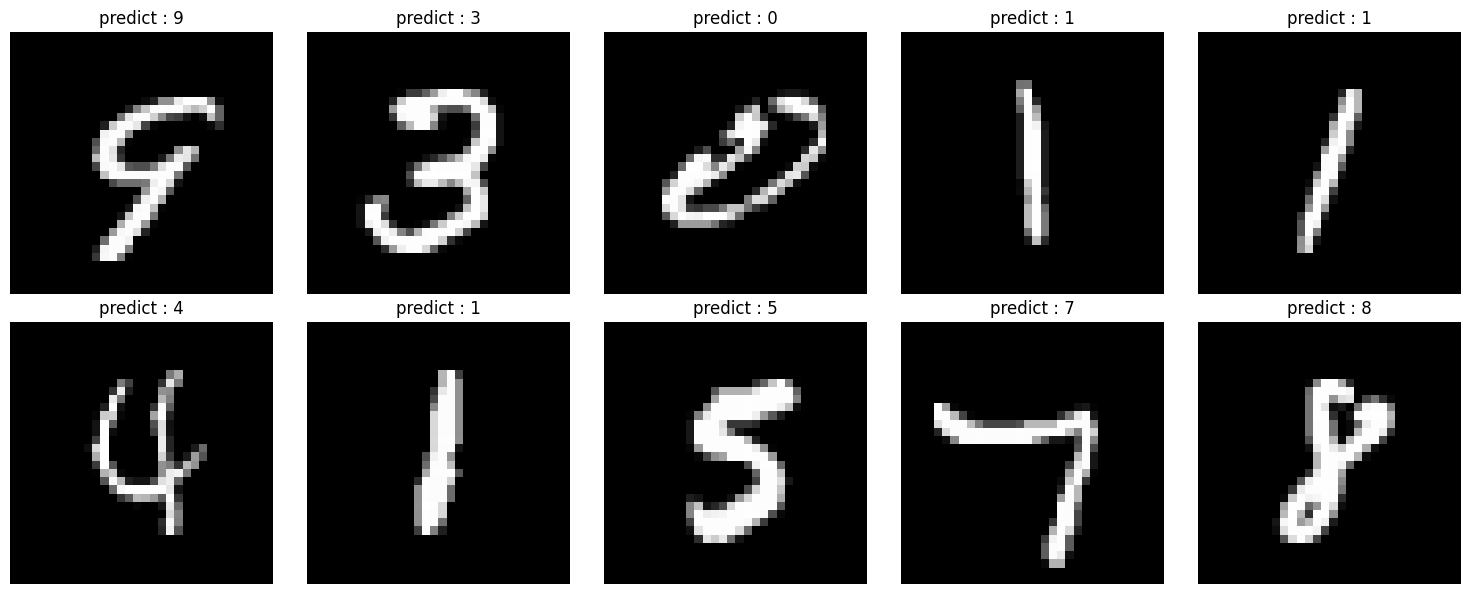

In [12]:
num_example = 10
test_sample = x_test[:10, :]
predict_test_sample = model.forward(test_sample)

# visualize 

imgs = []
for img in test_sample:
    img = img.reshape(32, 32)
    imgs.append(img)

titles = []
for title in predict_test_sample:
    titles.append(np.argmax(title))

# Create a figure with 2 rows and 5 columns
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# axes is a 2×5 array — flatten it so we can zip with images & titles
for ax, img, title in zip(axes.flat, imgs, titles):
    ax.imshow(img, cmap='gray')    # or remove cmap= if your images are RGB
    ax.set_title(f"predict : {title}")
    ax.axis('off')                 # turn off axis ticks/labels

plt.tight_layout()
plt.show()